# DMS gradient boosting

I use DMS experiments as a training set and try to predict the effect of mutations in a LOPO fashion.

## Load the training data

I use the save csv data from `dms_dataset_creation`.

In [6]:
import pandas as pd

df = pd.read_csv("/home/saul/master_thesis_work/dataset/dms/dms_training.csv")
df

/home/saul/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,protein,dms_id,uniprot_id,position,aa1,aa2,reported_fitness,pdb_id,pdb_chain,author_year,...,hmm_pssm_aa1_likelyhood,hmm_pssm_aa2_likelyhood,hmm_pssm_delta_likelyhood,tr_rosetta_feature_index,tr_rosetta_graph_closeness_centrality,tr_rosetta_graph_betweenness_centrality,tr_rosetta_graph_degree_centrality,tr_rosetta_graph_load_centrality,tr_rosetta_graph_harmonic_centrality,tr_rosetta_graph_clustering
0,TEM-1,beta-lactamase,P62593,20,P,P,0.581033,1btl,A,Firnberg2014,...,2.81126,2.81126,0.00000,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
1,TEM-1,beta-lactamase,P62593,20,P,Q,0.441480,1btl,A,Firnberg2014,...,2.81126,3.27353,0.46227,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
2,TEM-1,beta-lactamase,P62593,20,P,D,0.289750,1btl,A,Firnberg2014,...,2.81126,2.92236,0.11110,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
3,TEM-1,beta-lactamase,P62593,20,P,K,0.196582,1btl,A,Firnberg2014,...,2.81126,2.72602,-0.08524,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
4,TEM-1,beta-lactamase,P62593,20,P,N,0.053725,1btl,A,Firnberg2014,...,2.81126,3.00679,0.19553,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21837,Yap65,WW_domain,P46937,203,R,C,-2.667780,4rex,A,Fowler2010,...,0.59945,5.62776,5.02831,36,0.336134,0.011106,0.150000,0.010839,0.17050,0.800000
21838,Yap65,WW_domain,P46937,203,R,G,-2.731940,4rex,A,Fowler2010,...,0.59945,3.26877,2.66932,36,0.336134,0.011106,0.150000,0.010839,0.17050,0.800000
21839,Yap65,WW_domain,P46937,203,R,D,-2.850370,4rex,A,Fowler2010,...,0.59945,3.95240,3.35295,36,0.336134,0.011106,0.150000,0.010839,0.17050,0.800000
21840,Yap65,WW_domain,P46937,203,R,H,-3.011270,4rex,A,Fowler2010,...,0.59945,4.16162,3.56217,36,0.336134,0.011106,0.150000,0.010839,0.17050,0.800000


In [ ]:
dict(df.dtypes)

## Selecting the features to use

In [4]:
features = [
    "aa1",
    "aa2",
    #'ev_frequency',
    #'ev_conservation',
    "ev_independent",
    "ev_epistatic",
    "netsurf_rsa",
    #'netsurf_asa',
    #'netsurf_p_q3_H','netsurf_p_q3_E','netsurf_p_q3_C',
    #'netsurf_p_q8_G','netsurf_p_q8_H','netsurf_p_q8_I','netsurf_p_q8_B',
    #'netsurf_p_q8_E','netsurf_p_q8_S','netsurf_p_q8_T','netsurf_p_q8_C',
    #'netsurf_phi',
    #'netsurf_psi',
    "netsurf_disorder",
    #'hmm_pssm_A', 'hmm_pssm_C', 'hmm_pssm_D', 'hmm_pssm_E', 'hmm_pssm_F',
    #'hmm_pssm_G', 'hmm_pssm_H', 'hmm_pssm_I', 'hmm_pssm_K', 'hmm_pssm_L',
    #'hmm_pssm_M', 'hmm_pssm_N', 'hmm_pssm_P', 'hmm_pssm_Q', 'hmm_pssm_R',
    #'hmm_pssm_S', 'hmm_pssm_T', 'hmm_pssm_V', 'hmm_pssm_W', 'hmm_pssm_Y',
    #'hmm_pssm_aa1_likelyhood',
    "hmm_pssm_aa2_likelyhood",
    "hmm_pssm_delta_likelyhood",
    "tr_rosetta_graph_closeness_centrality",
    #'tr_rosetta_graph_betweenness_centrality',
    #'tr_rosetta_graph_degree_centrality',
    #'tr_rosetta_graph_load_centrality',
    #'tr_rosetta_graph_harmonic_centrality',
    #'tr_rosetta_graph_clustering',
]

# get dummies is an amazing function that automagically converts to 1-hot what is needed
x = pd.get_dummies(df[features])
x

,ev_independent,ev_epistatic,netsurf_rsa,netsurf_disorder,hmm_pssm_aa2_likelyhood,hmm_pssm_delta_likelyhood,tr_rosetta_graph_closeness_centrality,aa1_A,aa1_C,aa1_D,...,aa2_M,aa2_N,aa2_P,aa2_Q,aa2_R,aa2_S,aa2_T,aa2_V,aa2_W,aa2_Y
0,NaN,NaN,0.693609,0.992635,2.81126,0.00000,0.150237,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.849266,-5.159727,0.693609,0.992635,3.27353,0.46227,0.150237,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.544804,-6.004645,0.693609,0.992635,2.92236,0.11110,0.150237,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.504949,-5.030978,0.693609,0.992635,2.72602,-0.08524,0.150237,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.681884,-5.148633,0.693609,0.992635,3.00679,0.19553,0.150237,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21837,-8.631075,-8.171522,0.398042,0.267757,5.62776,5.02831,0.336134,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21838,-8.631075,-8.171522,0.398042,0.267757,3.26877,2.66932,0.336134,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21839,-8.631075,-8.171522,0.398042,0.267757,3.95240,3.35295,0.336134,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21840,-5.007457,-5.185575,0.398042,0.267757,4.16162,3.56217,0.336134,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Create the model

I declare some functions that define the model and the plotting routines for the results and for feature importances.

In [19]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import (
    MinMaxScaler,
    Normalizer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
)

import seaborn as sns

sns.set()


def preprocess_features(x, train_bool):
    return x


def lopo_plots_and_correlation(
    x_raw, df_raw, target, xbg_params, num_rounds=250, importance_type="weight"
):
    lopo = LeaveOneGroupOut()
    query_encoding = {
        id_str: list(set(df_raw.dms_id)).index(id_str) for id_str in set(df_raw.dms_id)
    }
    query_ids_raw = np.array(
        df_raw.dms_id.apply(lambda x: query_encoding[x])
    )  # xgboost requires qid to be numerical
    idx_sort = np.argsort(query_ids_raw)  # xgboost requires qid to be sorted
    query_ids = query_ids_raw[idx_sort]
    df = df_raw.iloc[idx_sort]
    x = x_raw.to_numpy(dtype="float32")[idx_sort]
    y = np.array(df[target])
    is_wt = np.array(df.aa1 == df.aa2)
    for train, val in lopo.split(x, groups=df.protein):
        curr_protein_tested = set(df.protein.iloc[val])
        x_curr = preprocess_features(x, train)
        d_all = xgb.DMatrix(data=x_curr, label=y)
        d_train = xgb.DMatrix(data=x_curr[train], label=y[train], qid=query_ids[train])
        y_pred = xgb.train(xgb_params, d_train, num_boost_round=num_rounds).predict(
            d_all
        )
        # for the train I need to evaluate any dataset independently, ranks among mutations in different proteins are not meaningful
        train_spearman_list = []
        for dataset in list(set(df.dms_id.iloc[train])):
            bool_to_consider = np.array(df.dms_id == dataset)
            train_spearman_list.append(
                stats.spearmanr(y_pred[bool_to_consider], y[bool_to_consider])[0]
            )
        train_spearman = np.average(train_spearman_list)
        for dataset in list(set(df.dms_id.iloc[val])):
            bool_to_consider = np.array(df.dms_id == dataset)
            d_single_dataset = xgb.DMatrix(
                data=x_curr[bool_to_consider],
                label=y[bool_to_consider],
                feature_names=x_raw.columns,
            )
            single_dataset_model = xgb.train(
                xgb_params, d_single_dataset, num_boost_round=num_rounds
            )
            print("Dataset:", dataset)
            print("Protein:", curr_protein_tested)
            print("Uniprot ID:", set(df.uniprot_id.iloc[bool_to_consider]))
            print("Basename:", set(df.feature_basename.iloc[bool_to_consider]))
            val_spearman = stats.spearmanr(
                y_pred[bool_to_consider], y[bool_to_consider]
            )[0]
            print("val spearman:", val_spearman, "train spearman:", train_spearman)
            plt.close()
            sns.scatterplot(
                x=y[bool_to_consider & ~is_wt],
                y=y_pred[bool_to_consider & ~is_wt],
                marker="x",
            )
            sns.scatterplot(
                x=y[bool_to_consider & is_wt],
                y=y_pred[bool_to_consider & is_wt],
                s=100,
                alpha=0.5,
            )
            plt.show()
            print(
                "Feature importance for the single dms id (model trained on validation data)"
            )
            plot_feature_importance(single_dataset_model, importance_type)


def plot_feature_importance_full_training_set(
    x_raw, df_raw, target, xbg_params, num_rounds=250, importance_type="weight"
):
    query_encoding = {
        id_str: list(set(df_raw.dms_id)).index(id_str) for id_str in set(df_raw.dms_id)
    }
    query_ids_raw = np.array(
        df_raw.dms_id.apply(lambda x: query_encoding[x])
    )  # xgboost requires qid to be numerical
    idx_sort = np.argsort(query_ids_raw)  # xgboost requires qid to be sorted
    query_ids = query_ids_raw[idx_sort]
    df = df_raw.iloc[idx_sort]
    x = x_raw.to_numpy(dtype="float32")[idx_sort]
    y = np.array(df[target])
    d_all = xgb.DMatrix(data=x, label=y, feature_names=x_raw.columns)
    model = xgb.train(xgb_params, d_all, num_boost_round=num_rounds)
    print("Model trained on all the dataset")
    plot_feature_importance(model, importance_type)
    single_dms_id_importances = pd.DataFrame()
    for i, dataset in enumerate(set(df.dms_id)):
        bool_to_consider = np.array(df.dms_id == dataset)
        d_single_dataset = xgb.DMatrix(
            data=x[bool_to_consider],
            label=y[bool_to_consider],
            feature_names=x_raw.columns,
        )
        single_dms_id_model = xgb.train(
            xgb_params, d_single_dataset, num_boost_round=num_rounds
        )
        single_dms_id_importances = pd.concat(
            [
                single_dms_id_importances,
                pd.DataFrame(
                    single_dms_id_model.get_score(importance_type=importance_type),
                    index=[i],
                ),
            ]
        )
    single_dms_id_importances.fillna(0, inplace=True)
    single_dms_id_importances = de_dummyfy(single_dms_id_importances)
    mean_importances_sorted = single_dms_id_importances.mean().sort_values(
        ascending=False
    )
    df_to_plot = single_dms_id_importances.reindex(
        mean_importances_sorted.index, axis="columns"
    )
    print("Variability for models trained independently on each dms experiment")
    plt.close()
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)
    sns.barplot(data=df_to_plot)
    plt.show()


def plot_feature_importance(model, importance_type="weight"):
    df_to_plot = de_dummyfy(
        pd.DataFrame(model.get_score(importance_type=importance_type), index=[0])
    ).sort_values(by=0, axis="columns", ascending=False)
    print("Feature importance by:", importance_type)
    plt.close()
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)
    sns.barplot(data=df_to_plot)
    plt.show()


def de_dummyfy(df):
    dummy_features = [
        "aa1_A",
        "aa1_C",
        "aa1_D",
        "aa1_E",
        "aa1_F",
        "aa1_G",
        "aa1_H",
        "aa1_I",
        "aa1_K",
        "aa1_L",
        "aa1_M",
        "aa1_N",
        "aa1_P",
        "aa1_Q",
        "aa1_R",
        "aa1_S",
        "aa1_T",
        "aa1_V",
        "aa1_W",
        "aa1_Y",
        "aa2_A",
        "aa2_C",
        "aa2_D",
        "aa2_E",
        "aa2_F",
        "aa2_G",
        "aa2_H",
        "aa2_I",
        "aa2_K",
        "aa2_L",
        "aa2_M",
        "aa2_N",
        "aa2_P",
        "aa2_Q",
        "aa2_R",
        "aa2_S",
        "aa2_T",
        "aa2_V",
        "aa2_W",
        "aa2_Y",
        #'ev_frequency',
        #'ev_conservation',
        "ev_independent",
        "ev_epistatic",
        "netsurf_rsa",
        #'netsurf_asa',
        "netsurf_p_q3_H",
        "netsurf_p_q3_E",
        "netsurf_p_q3_C",
        "netsurf_p_q8_G",
        "netsurf_p_q8_H",
        "netsurf_p_q8_I",
        "netsurf_p_q8_B",
        "netsurf_p_q8_E",
        "netsurf_p_q8_S",
        "netsurf_p_q8_T",
        "netsurf_p_q8_C",
        #'netsurf_phi',
        #'netsurf_psi',
        "netsurf_disorder",
        "hmm_pssm_A",
        "hmm_pssm_C",
        "hmm_pssm_D",
        "hmm_pssm_E",
        "hmm_pssm_F",
        "hmm_pssm_G",
        "hmm_pssm_H",
        "hmm_pssm_I",
        "hmm_pssm_K",
        "hmm_pssm_L",
        "hmm_pssm_M",
        "hmm_pssm_N",
        "hmm_pssm_P",
        "hmm_pssm_Q",
        "hmm_pssm_R",
        "hmm_pssm_S",
        "hmm_pssm_T",
        "hmm_pssm_V",
        "hmm_pssm_W",
        "hmm_pssm_Y",
        #'hmm_pssm_aa1_likelyhood',
        "hmm_pssm_aa2_likelyhood",
        "hmm_pssm_delta_likelyhood",
        #'tr_rosetta_graph_closeness_centrality',
        #'tr_rosetta_graph_betweenness_centrality',
        #'tr_rosetta_graph_degree_centrality',
        #'tr_rosetta_graph_load_centrality',
        #'tr_rosetta_graph_harmonic_centrality',
        #'tr_rosetta_graph_clustering',
    ]
    standard_aa = [
        "A",
        "C",
        "D",
        "E",
        "F",
        "G",
        "H",
        "I",
        "K",
        "L",
        "M",
        "N",
        "P",
        "Q",
        "R",
        "S",
        "T",
        "V",
        "W",
        "Y",
    ]
    q3_ss = ["H", "E", "C"]
    q8_ss = ["G", "H", "I", "B", "E", "S", "T", "C"]
    assert len(standard_aa) == 20
    assert len(q3_ss) == 3
    assert len(q8_ss) == 8
    for feature in dummy_features:
        if feature not in df.columns:
            df[feature] = 0
    de_dummy_dict = {
        "aa1": ["aa1_" + aa for aa in standard_aa],
        "aa2": ["aa2_" + aa for aa in standard_aa],
        "hmm_pssm": ["hmm_pssm_" + aa for aa in standard_aa],
        "netsurf_p_q3": ["netsurf_p_q3_" + ss for ss in q3_ss],
        "netsurf_p_q8": ["netsurf_p_q8_" + ss for ss in q8_ss],
    }
    for key in de_dummy_dict:
        summarised_importance = np.array(
            [df[value] for value in de_dummy_dict[key]]
        ).mean(axis=0)
        df[key] = summarised_importance
        for value in de_dummy_dict[key]:
            df = df.drop(value, axis="columns")
    return df


xgb_params = {
    "max_depth": 6,
    "min_child_weight": 6,
    "subsample": 0.2,
    "colsample_bytree": 0.8,
    "gamma": 1,
    "eta": 0.05,
    "tree_method": "hist",
    "objective": "rank:pairwise",
    "nthread": 7,
    "lambda": 0,  # L2 regularization
    "alpha": 0,  # L1 regularization
}
num_rounds = 50

Dataset: kka2_1:2
Protein: {'Kka2'}
Uniprot ID: {'P00552'}
Basename: {'P00552'}
val spearman: 0.6543528940163486 train spearman: 0.6766414857201825


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


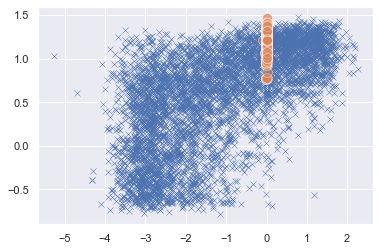

Feature importance for the single dms id (model trained on validation data)
Feature importance by: gain


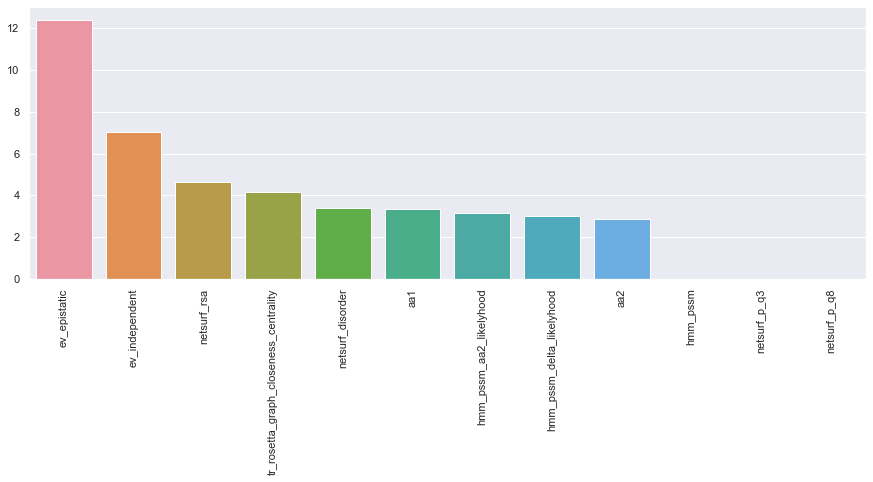

Dataset: PSD95pdz3
Protein: {'PSD95pdz3'}
Uniprot ID: {'P31016'}
Basename: {'P31016'}
val spearman: 0.5470380538034949 train spearman: 0.6694948224175112


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


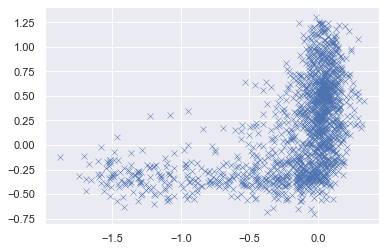

Feature importance for the single dms id (model trained on validation data)
Feature importance by: gain


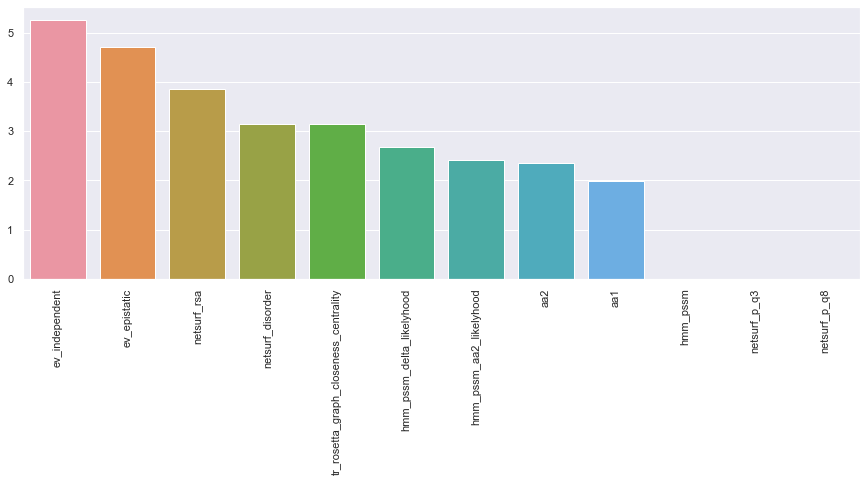

Dataset: Pab1
Protein: {'Pab1'}
Uniprot ID: {'P04147'}
Basename: {'P04147'}
val spearman: 0.680756153716196 train spearman: 0.6616483430548246


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


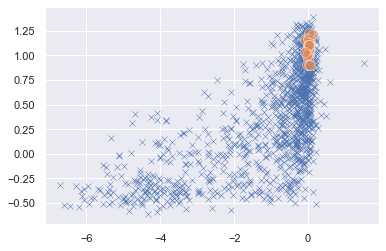

Feature importance for the single dms id (model trained on validation data)
Feature importance by: gain


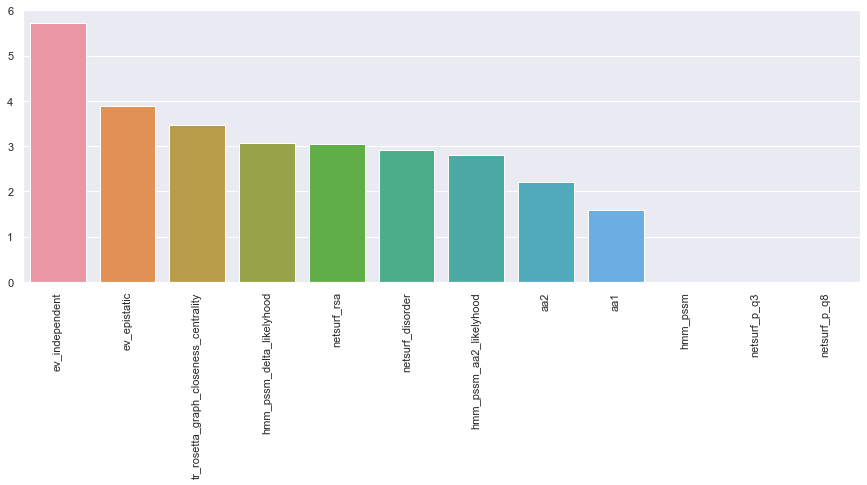

Dataset: beta-lactamase
Protein: {'TEM-1'}
Uniprot ID: {'P62593'}
Basename: {'P62593'}
val spearman: 0.7317679816258674 train spearman: 0.659015202491336


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


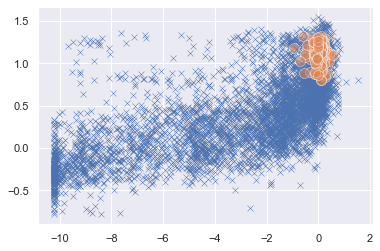

Feature importance for the single dms id (model trained on validation data)
Feature importance by: gain


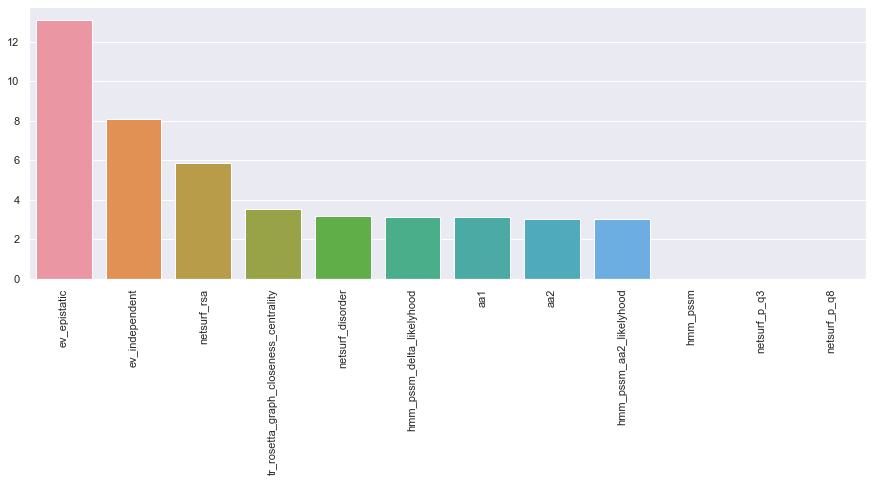

Dataset: Ubiquitin
Protein: {'UBI4'}
Uniprot ID: {'P0CG63'}
Basename: {'P0CG63_1-76'}
val spearman: 0.46137506727301747 train spearman: 0.6911111700128166


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


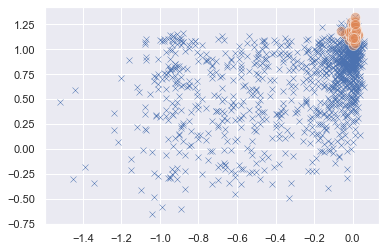

Feature importance for the single dms id (model trained on validation data)
Feature importance by: gain


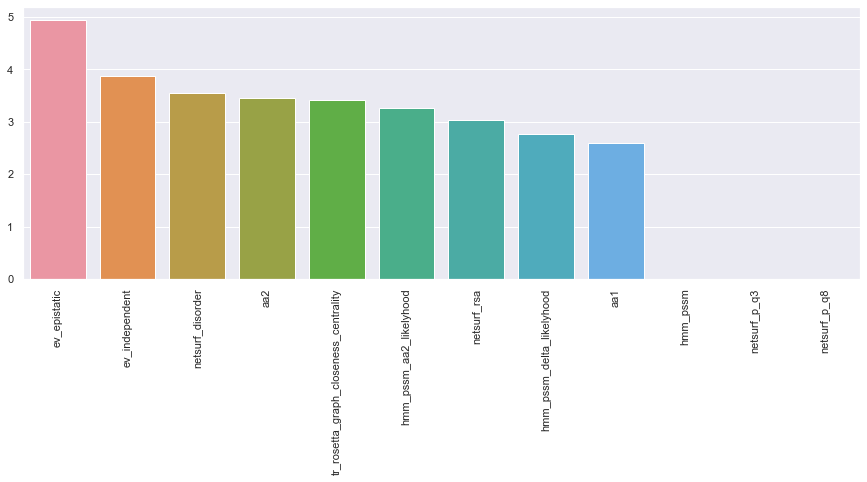

Dataset: E1_Ubiquitin
Protein: {'UBI4'}
Uniprot ID: {'P0CG63'}
Basename: {'P0CG63_1-76'}
val spearman: 0.5025616728067107 train spearman: 0.6911111700128166


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


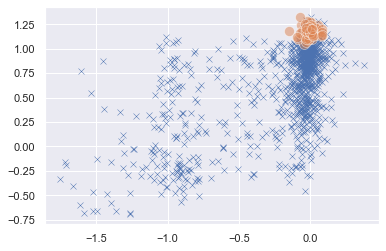

Feature importance for the single dms id (model trained on validation data)
Feature importance by: gain


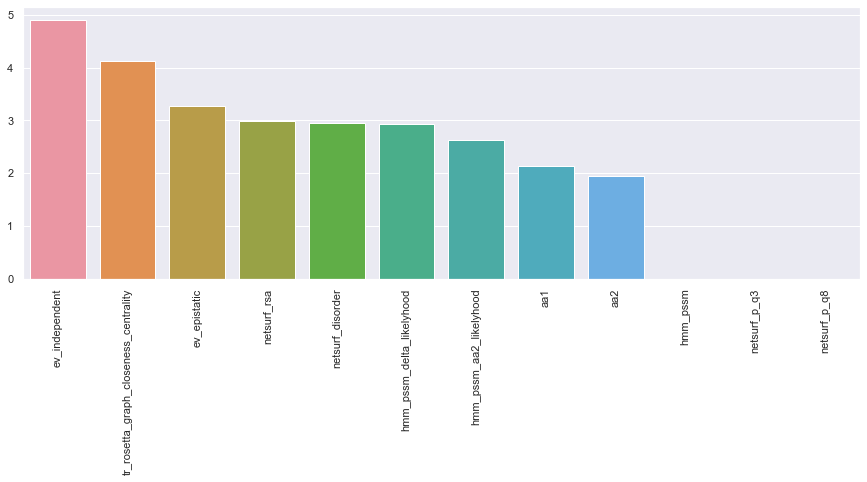

Dataset: WW_domain
Protein: {'Yap65'}
Uniprot ID: {'P46937'}
Basename: {'P46937'}
val spearman: 0.6554392418465913 train spearman: 0.6633849912782415


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


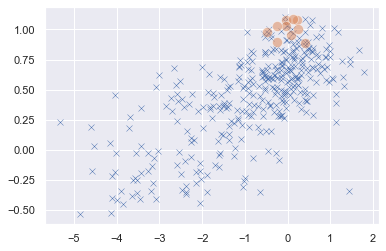

Feature importance for the single dms id (model trained on validation data)
Feature importance by: gain


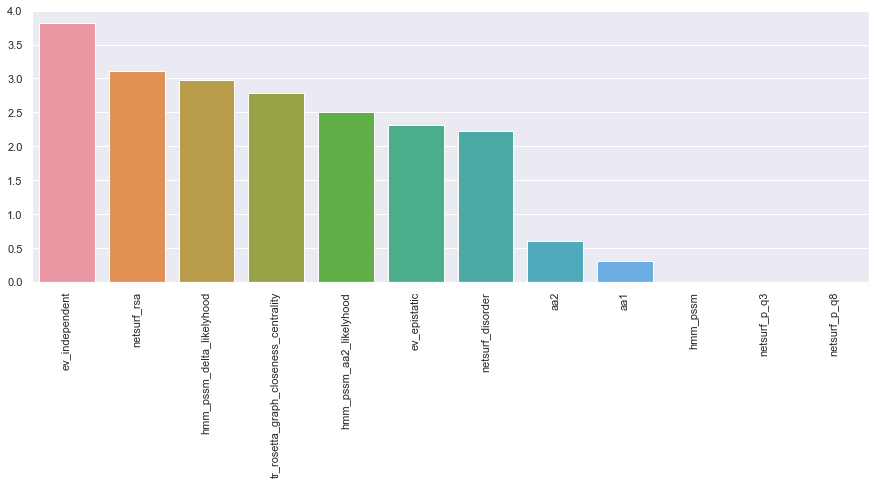

Dataset: gb1
Protein: {'gb1'}
Uniprot ID: {'P06654'}
Basename: {'P06654'}
val spearman: 0.4283495976221737 train spearman: 0.6576132879076305


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


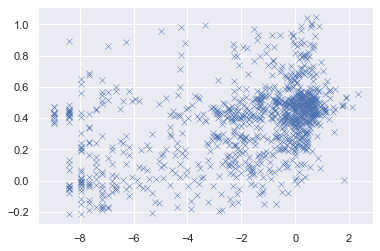

Feature importance for the single dms id (model trained on validation data)
Feature importance by: gain


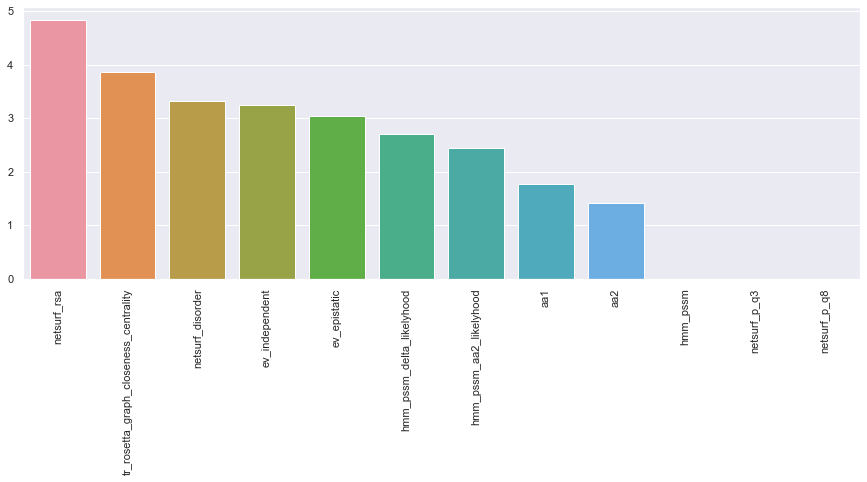

Dataset: hsp90
Protein: {'hsp90'}
Uniprot ID: {'P02829'}
Basename: {'P02829_2-231'}
val spearman: 0.45084399410514014 train spearman: 0.6885269142991005


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


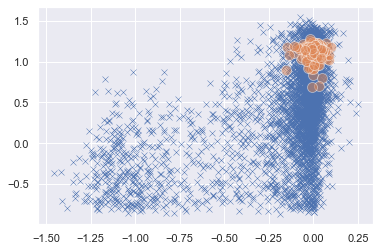

Feature importance for the single dms id (model trained on validation data)
Feature importance by: gain


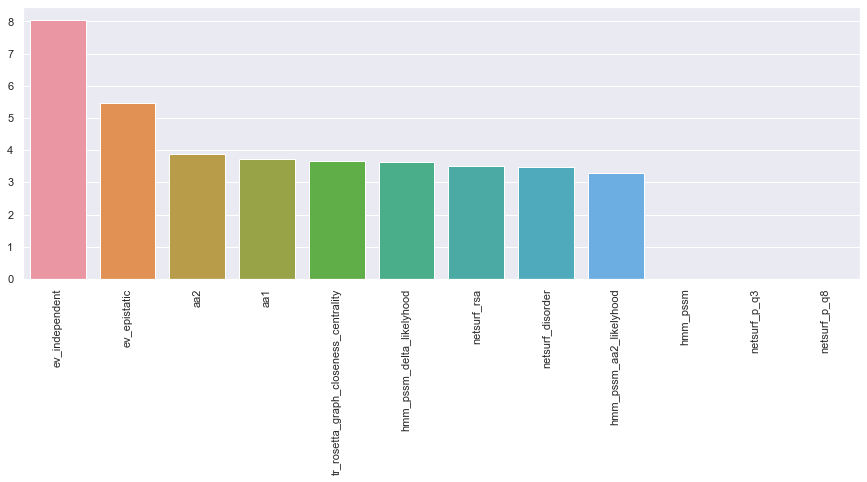

In [20]:
lopo_plots_and_correlation(x, df, "reported_fitness", xgb_params, num_rounds, "gain")

## Feature importance on the full dataset

Model trained on all the dataset
Feature importance by: gain


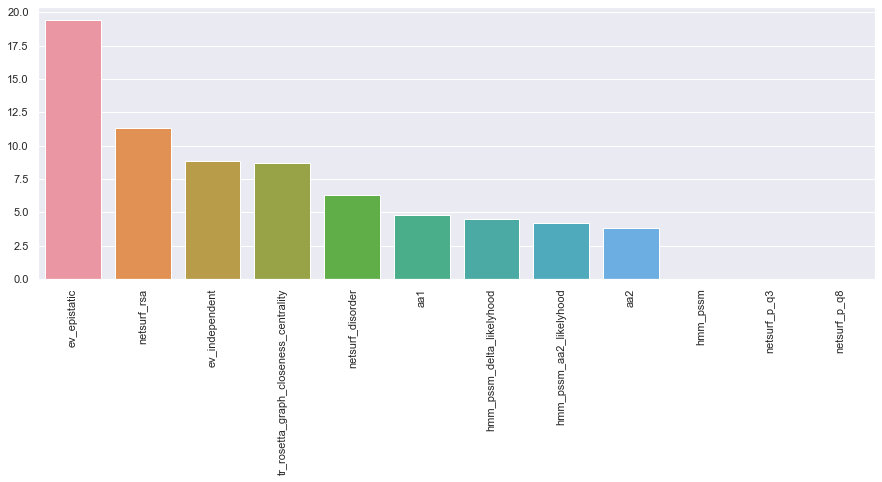

Variability for models trained independently on each dms experiment


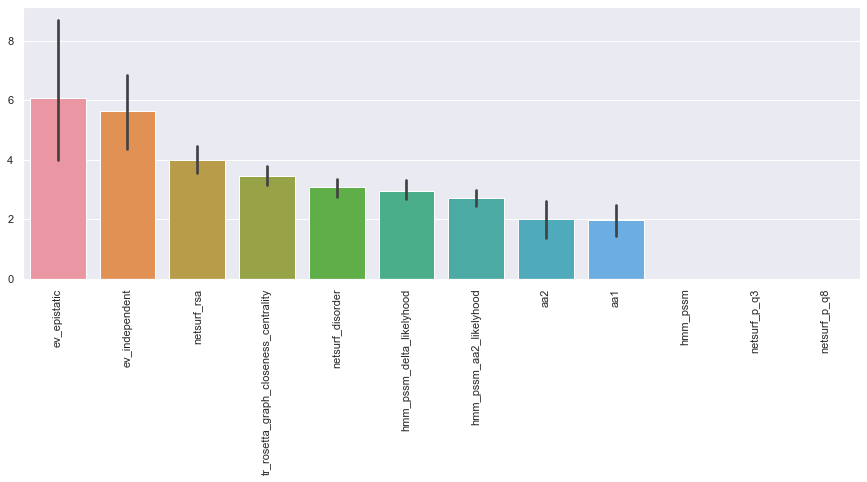

In [5]:
plot_feature_importance_full_training_set(
    x, df, "reported_fitness", xgb_params, num_rounds, "gain"
)